In [2]:
import random
from os import listdir
from os.path import isdir, join

import librosa
import matplotlib.pyplot as plt
import numpy as np
import python_speech_features

In [7]:
# Dataset path and view possible targets
dataset_path = 'C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

apeleaza
cinci
diez
doi
elimina
formeaza
noua
opt
patru
sapte
sase
steluta
sterge
trei
unu
urgenta
zero


In [8]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['apeleaza', 'cinci', 'diez', 'doi', 'elimina', 'formeaza', 'noua', 'opt', 'patru', 'sapte', 'sase', 'steluta', 'sterge', 'trei', 'unu', 'urgenta', 'zero']


In [9]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

60
41
60
41
60
60
41
41
41
41
41
60
60
41
41
60
41
Total samples: 830


In [11]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.3
test_ratio = 0.3
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [12]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\apeleaza
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\cinci
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\diez
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\doi
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\elimina
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\formeaza
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\noua
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\opt
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\patru
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\sapte
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\sase
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\steluta
C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate\sterge
C:/Users//radu2/OneDrive/Desktop/C

In [13]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2.]), array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.]), array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4.,

In [14]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [15]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [16]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

830
830


In [17]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)
print(val_set_size)
print(test_set_size)

249
249


In [20]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]
# filenames_val=filenames[:val_set_size]
# filenames_test=filenames[:val_set_size]
# filenames_train=filenames[:val_set_size]

print(len(filenames_val))
print(len(filenames_test))
print(len(filenames_train))

249
249
332


In [21]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]
# y_orig_val=y[:val_set_size]
# y_orig_test=y[:val_set_size]
# y_orig_train=y[:val_set_size]

In [22]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=20,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [23]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs - Mel-frequency cepstral coefficients 
    mfccs = calc_mfcc(path)
    # for i in mfccs:
    #      print(i)

    #print(mfccs.shape)
    if mfccs.shape[1] == len_mfcc: #here is the problem with shape
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

Dropped: 0 (16, 9)
Dropped: 1 (16, 12)
Dropped: 2 (16, 9)
Dropped: 3 (16, 10)
Dropped: 4 (16, 10)
Dropped: 5 (16, 5)
Dropped: 6 (16, 7)
Dropped: 7 (16, 9)
Dropped: 8 (16, 10)
Dropped: 9 (16, 14)
Dropped: 10 (16, 5)
Dropped: 11 (16, 3)
Dropped: 12 (16, 6)
Dropped: 13 (16, 13)
Dropped: 14 (16, 7)
Dropped: 15 (16, 10)
Dropped: 16 (16, 10)
Dropped: 17 (16, 12)
Dropped: 18 (16, 4)
Dropped: 19 (16, 8)
Dropped: 20 (16, 11)
Dropped: 21 (16, 9)
Dropped: 22 (16, 8)
Dropped: 23 (16, 3)
Dropped: 24 (16, 6)
Dropped: 25 (16, 14)
Dropped: 26 (16, 6)
Dropped: 27 (16, 6)
Dropped: 28 (16, 9)
Dropped: 29 (16, 8)
Dropped: 30 (16, 6)
Dropped: 31 (16, 8)
Dropped: 32 (16, 13)
Dropped: 33 (16, 10)
Dropped: 34 (16, 4)
Dropped: 35 (16, 10)
Dropped: 36 (16, 4)
Dropped: 37 (16, 13)
Dropped: 38 (16, 7)
Dropped: 39 (16, 5)
Dropped: 40 (16, 13)
Dropped: 41 (16, 9)
Dropped: 42 (16, 3)
Dropped: 43 (16, 5)
Dropped: 44 (16, 10)
Dropped: 45 (16, 14)
Dropped: 46 (16, 10)
Dropped: 47 (16, 13)
Dropped: 48 (16, 3)
Dropped: 4

In [24]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.664


MFCCs: [[-2.22354384e+01 -2.36482285e+01 -2.80881846e+01 -3.47792096e+01]
 [ 8.43186646e+00  9.01053538e+00  9.62124203e+00  9.70690129e+00]
 [ 9.05497490e+00  1.02660960e+01  1.15379616e+01  1.16984488e+01]
 [-2.60344467e-01 -6.96349777e-01 -7.42317362e-01 -3.64773675e-01]
 [-3.31969058e+00 -3.18193954e+00 -2.06128956e+00  3.37780921e-01]
 [ 3.54938531e-02  1.63411904e-01 -1.92318311e-01 -9.26590980e-01]
 [-4.14570912e-02 -3.71847175e-01 -9.37093964e-01 -1.54383288e+00]
 [ 1.63423541e-01 -3.45271380e-02  3.23902922e-02  2.34307126e-01]
 [ 1.17528447e+00  1.34114211e+00  1.36944813e+00  1.30460501e+00]
 [-4.56576124e-01 -2.37865774e-01 -1.24096354e-01  1.06496744e-02]
 [-8.46011454e-01 -4.10020531e-01 -2.03267291e-02 -1.80810512e-01]
 [-9.40095824e-01 -1.11392331e+00 -1.37870693e+00 -1.49731208e+00]
 [-1.11544757e+00 -1.37577175e+00 -1.35151462e+00 -6.93091620e-01]
 [-1.54873051e-01 -7.02574412e-02 -1.32126527e-01 -6.77732952e-02]
 [-6.40546904e-02 -7.49341010e-02  1.67504808e-02 -1.34

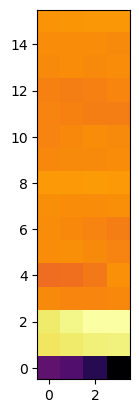

In [29]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 18

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)
print(mfccs.shape[0])
print(mfccs.shape[1])
desired_rows=16
desired_cols=16
#asa ar arata daca as adauga padding constant, nu e ok
#my_mfcc = np.pad(mfccs, ((0, desired_rows-mfccs.shape[0]), (0, desired_cols-mfccs.shape[1])), 'constant', constant_values=-25) 

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [31]:
# Function: Create MFCCs, keeping only ones of desired length
desired_rows = 16
desired_cols = 16
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)
        
        # Only keep MFCCs with given length
        if mfccs.shape[1] > len_mfcc/3 and mfccs.shape[1]<=len_mfcc: #1->0  #Trebuie sa modific, nu pot sa fac padding.
            
            print(mfccs.shape[0])
            print(mfccs.shape[1])
            my_mfcc = np.pad(mfccs, ((0, desired_rows-mfccs.shape[0]), (0, desired_cols-mfccs.shape[1])), 'constant', constant_values=-25)
            out_x.append(my_mfcc)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [30]:
print(len_mfcc/3)

5.333333333333333


In [32]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

16
9
16
12
16
9
16
10
16
10
Dropped: 5 (16, 5)
16
7
16
9
16
10
16
14
Dropped: 10 (16, 5)
Dropped: 11 (16, 3)
16
6
16
13
16
7
16
10
16
10
16
12
Dropped: 18 (16, 4)
16
8
16
11
16
9
16
8
Dropped: 23 (16, 3)
16
6
16
14
16
6
16
6
16
9
16
8
16
6
16
8
16
13
16
10
Dropped: 34 (16, 4)
16
10
Dropped: 36 (16, 4)
16
13
16
7
Dropped: 39 (16, 5)
16
13
16
9
Dropped: 42 (16, 3)
Dropped: 43 (16, 5)
16
10
16
14
16
10
16
13
Dropped: 48 (16, 3)
16
8
16
7
16
11
Dropped: 52 (16, 2)
Dropped: 53 (16, 4)
16
6
16
8
Dropped: 56 (16, 5)
16
11
16
8
16
7
Dropped: 60 (16, 4)
16
8
16
10
16
10
16
12
Dropped: 65 (16, 5)
16
9
Dropped: 67 (16, 4)
16
12
16
9
16
13
16
11
16
13
16
8
16
11
16
10
16
13
16
11
16
8
16
8
16
11
16
8
16
10
16
7
16
9
Dropped: 85 (16, 5)
Dropped: 86 (16, 4)
16
13
16
12
16
6
16
10
16
8
Dropped: 92 (16, 4)
16
11
Dropped: 94 (16, 4)
16
12
16
9
16
12
Dropped: 98 (16, 3)
16
10
16
13
16
9
Dropped: 102 (16, 3)
16
11
16
10
16
13
16
12
16
6
Dropped: 108 (16, 4)
16
7
Dropped: 110 (16, 4)
16
9
16
8
16
13
16
11

In [68]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [69]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [70]:
print(len(feature_sets['x_train']))
print(len(feature_sets['y_train']))
print(len(feature_sets['x_val']))
print(len(feature_sets['x_train']))

601
601
601
601


In [71]:
print(feature_sets['y_val'])

[ 0. 15.  8. 15.  6. 11. 11.  7.  0.  7. 15. 15. 10. 11. 15.  5. 12.  4.
 11. 12. 11.  5. 11.  9. 12. 11.  6.  9. 15.  7. 12.  4. 10. 11. 16. 15.
  0. 11.  1. 11.  4.  0. 12.  4.  6.  7.  4. 10.  4.  6.  0. 16.  1.  4.
  3. 12.  2.  5. 11. 12. 12. 10.  1. 12.  4. 10.  5.  0.  5. 15.  2.  4.
  2. 16.  8. 12.  3.  9. 11.  6.  8. 14. 12.  4. 12.  5. 15.  5. 15.  6.
  2.  4.  8. 11. 11. 11.  4. 12.  4.  5. 10.  5. 12.  9.  5.  2.  7.  2.
 12.  0. 12.  2.  7. 12. 16.  4.  0. 16.  6.  5.  4.  9.  2. 12. 12. 15.
 12. 16. 12.  2. 11.  1. 11. 11. 12.  5.  7. 16.  2. 15. 11.  9.  2.  4.
 11.  1. 15.  1.  4. 11. 11.  2. 15.  1.  1.  2.  0. 12. 14.  2.  1.  0.
  2.  5.  1.  5.  9.  2. 11.  1. 15. 15. 12.  2.  4. 11. 12.  5.  6.  8.
  0. 15. 12. 12.  0.  0. 11. 11.  8.  2. 11.  5. 12. 15.  0.  0.  0.  8.
  8.  3. 11.  0. 11.  5.  9.  2.  9.  2.  5.  7. 15. 12. 12.  4.  0. 11.
 16. 12.  5. 15.  6.  5.  4. 15.  7.  2.  6. 15.  9.  9.  7.  6.  6.  0.
  5.  7.  0. 15.  5. 12.  5.  7.  2.  4. 10.  5.  5